method1 : Extratc the image from Java script ( Need to understand Java script)
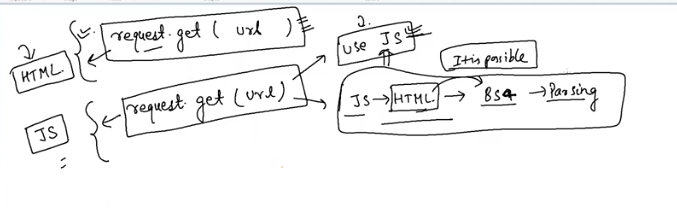
Method 2: Extratc the image from Java script  & convert HTML - Easy method-Monstar

In [5]:
import os
import time
import requests
from selenium import webdriver


In [8]:
# Steps:
# 1.pip install the selenium,pillo,requests
# 2.make sure you have chrome installed on your machine
# 3.Check your chrome version
# 4.Downlod the driver 
# 5.Put into current path

In [9]:
def fetch_image_urls(query: str, max_links_to_fetch: int, wd: webdriver, sleep_between_interactions: int = 1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)

        # build the google query
    # Q- qury item -we need 2 times &  gs_l is image
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        # Navigate till end
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)

        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls


In [10]:
def persist_image(folder_path:str,url:str, counter):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        f = open(os.path.join(folder_path, 'jpg' + "_" + str(counter) + ".jpg"), 'wb')
        f.write(image_content)
        f.close()
        print(f"SUCCESS - saved {url} - as {folder_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [11]:
def search_and_download(search_term: str, driver_path: str, target_path='./images', number_images=10):
    # Target folder to store the image
    target_folder = os.path.join(target_path, '_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
   # Open the driver & excute the driver as wd - pass this to call method.
    with webdriver.Chrome(executable_path=driver_path) as wd:
        # call fetch_image_urls with what items to search,number of image to search,driver,delay time
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)

    counter = 0
    for elem in res:
        persist_image(target_folder, elem, counter)
        counter += 1

In [18]:
# How to execute this code
# Step 1 : pip install selenium. pillow, requests
# Step 2 : make sure you have chrome installed on your machine
# Step 3 : Check your chrome version ( go to three dot then help then about google chrome )
# Step 4 : Download the same chrome driver from here  " https://chromedriver.storage.googleapis.com/index.html "
# Step 5 : put it inside the same folder of this code


DRIVER_PATH = r'C:\MachineLearning\iNeuron_ML\Week9\ImageScrapper\chromedriver.exe'
search_term = 'apple'
# num of images you can pass it from here  by default it's 10 if you are not passing
# number_images = 10
# Call method
search_and_download(search_term=search_term, driver_path=DRIVER_PATH)

Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSet9wR7BIfivskvbHKeaBIIzZuJzwTenFSiA&usqp=CAU - as ./images\apple
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkdM_1TTBu_pVpynnFsb_t255BIkdWTmwN3g&usqp=CAU - as ./images\apple
SUCCESS - saved https://yt3.ggpht.com/ytc/AAUvwnjMQg0vNJYMPsEA4X60Oqgj6A_ko4cLP0duHRG0cA=s900-c-k-c0x00ffffff-no-rj - as ./images\apple
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ981-7IHVx96bUQ6iKuQzPegUFYv-UK8IYyw&usqp=CAU - as ./images\apple
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjg9e0Catb89J5lz6qcpVGmISSa-3ITiJKaA&usqp=CAU - as ./images\apple
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7a1rFxKTKtlw7cFohz5uBEdAB99ZVUMLwPA&usqp=CAU - as ./images\apple
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4xoBIGU5wHD4PxW3r7ZjTOzrNP4Iw